# Examen del 2do Parcial

1. Utilizando el dataset de _Coactivation_matrix.mat_:
- Calcule el coeficiente de mundo pequeño
- Calcule las comunidades del grafo
- Calcule los hub
- Calcule la eficiencia global
- Calcule la eficiencia local
- Determine el grado de cada nodo

2. Utilizando el dataset de _Coactivation_matrix.mat_:
- Generar el mapa de calor de cada matriz de conectividad
- Generar la distribución de datos de cada matriz de conectividad
- ¿Qué valor se encuentra en el percentil 0.25, 0.5 y 0.75 de la matriz de conectividad?
- Cree los 3 grafos 2D filtrando la matriz de conectividad con los valores dados por los percentiles del ejercicio anterior

3. Utilizando el dataset de _Coactivation_matrix.mat_:
- Genere el grafo 3D
- Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
- Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot

4. Utilizando el dataset de _chb01_01.edf_:
- Calcule el coeficiente de mundo pequeño
- Calcule las comunidades del grafo
- Calcule los hub
- Calcule la eficiencia global
- Calcule la eficiencia local
- Determine el grado de cada nodo

5. Utilizando el dataset de _chb01_01.edf_:
- Genere el grafo 3D
- Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
- Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot


In [209]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
import networkx.algorithms.smallworld as sw
import networkx.algorithms.community as nx_comm
import mne
from scipy.signal import coherence, hilbert


In [26]:
!pip install mne

You should consider upgrading via the 'C:\Users\mafig\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



     ---------------------------------------- 7.4/7.4 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 64.6/64.6 KB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 KB 2.2 MB/s eta 0:00:00


In [286]:
file_path=r"C:\Users\mafig\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\BCT\Coactivation_matrix.mat"
file_dict=scipy.io.loadmat(file_path)
comat=file_dict['Coactivation_matrix']
coord=file_dict['Coord']
G=nx.from_numpy_array(comat)
file_dict

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Wed Dec 25 01:14:03 2013',
 '__version__': '1.0',
 '__globals__': [],
 'Coactivation_matrix': array([[0.        , 0.16071429, 0.11148649, ..., 0.        , 0.05045872,
         0.1011236 ],
        [0.16071429, 0.        , 0.06825939, ..., 0.        , 0.        ,
         0.06923077],
        [0.11148649, 0.06825939, 0.        , ..., 0.03412969, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.03412969, ..., 0.        , 0.        ,
         0.        ],
        [0.05045872, 0.        , 0.        , ..., 0.        , 0.        ,
         0.09777778],
        [0.1011236 , 0.06923077, 0.        , ..., 0.        , 0.09777778,
         0.        ]], shape=(638, 638)),
 'Coord': array([[ 7.24363636, 37.01090909,  9.42545455],
        [ 7.98653199, 46.22222222, 15.60942761],
        [ 7.55725191, 33.83206107, 23.51145038],
        ...,
        [-4.92385787, 15.31979695, 27.73604061],
        [-6.

In [277]:
comat_df

,0,1,2,3,4,5,6,7,8,9,...,628,629,630,631,632,633,634,635,636,637
0,0.000000,0.160714,0.111486,0.000000,0.138095,0.00000,0.000000,0.000000,0.0,0.034351,...,0.0,0.000000,0.0,0.0,0.157676,0.053872,0.049383,0.000000,0.050459,0.101124
1,0.160714,0.000000,0.068259,0.000000,0.042056,0.00000,0.000000,0.000000,0.0,0.036585,...,0.0,0.000000,0.0,0.0,0.119149,0.042105,0.000000,0.000000,0.000000,0.069231
2,0.111486,0.068259,0.000000,0.224199,0.000000,0.00000,0.000000,0.052846,0.0,0.000000,...,0.0,0.047035,0.0,0.0,0.000000,0.161905,0.103943,0.034130,0.000000,0.000000
3,0.000000,0.000000,0.224199,0.000000,0.000000,0.00000,0.039275,0.048035,0.0,0.000000,...,0.0,0.048673,0.0,0.0,0.000000,0.000000,0.075697,0.108787,0.000000,0.000000
4,0.138095,0.042056,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.066079,0.000000,0.000000,0.000000,0.103448,0.053279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0.053872,0.042105,0.161905,0.000000,0.000000,0.00000,0.000000,0.072650,0.0,0.051195,...,0.0,0.046414,0.0,0.0,0.078498,0.000000,0.196721,0.091255,0.000000,0.000000
634,0.049383,0.000000,0.103943,0.075697,0.000000,0.03876,0.000000,0.000000,0.0,0.000000,...,0.0,0.033019,0.0,0.0,0.057377,0.196721,0.000000,0.111650,0.000000,0.000000
635,0.000000,0.000000,0.034130,0.108787,0.000000,0.00000,0.105839,0.083951,0.0,0.000000,...,0.0,0.053528,0.0,0.0,0.000000,0.091255,0.111650,0.000000,0.000000,0.000000
636,0.050459,0.000000,0.000000,0.000000,0.103448,0.00000,0.000000,0.000000,0.0,0.046729,...,0.0,0.000000,0.0,0.0,0.059361,0.000000,0.000000,0.000000,0.000000,0.097778


In [164]:
#Calcular coeficiente de mundo pequeño
G=nx.from_numpy_array(comat)

C = nx.average_clustering(G)
L = nx.average_shortest_path_length(G.subgraph(max(nx.connected_components(G), key=len)))
G_r = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges())
Cr = nx.average_clustering(G_r)
Lr = nx.average_shortest_path_length(G_r)
sigma = (C / Cr) / (L / Lr)

print(f"Coeficiente de mundo pequeño (σ): {sigma:.3f}")

Coeficiente de mundo pequeño (σ): 3.640


In [304]:
#Calcular hubs
G=nx.from_numpy_array(comat)
sorted(nx.degree(G),key=lambda x: x[1],reverse=True)[0:10]

[(330, 179),
 (482, 172),
 (230, 164),
 (416, 163),
 (485, 161),
 (235, 160),
 (356, 153),
 (494, 152),
 (350, 151),
 (400, 151)]

In [290]:
#Calcular eficiencia global
efg=nx.global_efficiency(G)
print(f"Eficiencia global: {efg:.3f}")

Eficiencia global: 0.495


In [291]:
#Calcular eficiencia local
efl=nx.local_efficiency(G)
print(f"Eficiencia local: {efl:.3f}")

Eficiencia local: 0.664


In [176]:
#Grado de cada nodo

degree=dict(nx.degree(G))
degree

{0: 32,
 1: 26,
 2: 38,
 3: 37,
 4: 29,
 5: 58,
 6: 88,
 7: 124,
 8: 29,
 9: 57,
 10: 54,
 11: 59,
 12: 44,
 13: 49,
 14: 50,
 15: 36,
 16: 124,
 17: 49,
 18: 86,
 19: 109,
 20: 73,
 21: 37,
 22: 62,
 23: 47,
 24: 31,
 25: 54,
 26: 20,
 27: 35,
 28: 27,
 29: 40,
 30: 30,
 31: 42,
 32: 31,
 33: 37,
 34: 29,
 35: 56,
 36: 49,
 37: 108,
 38: 149,
 39: 73,
 40: 78,
 41: 114,
 42: 120,
 43: 123,
 44: 126,
 45: 76,
 46: 90,
 47: 43,
 48: 51,
 49: 34,
 50: 85,
 51: 54,
 52: 25,
 53: 31,
 54: 47,
 55: 25,
 56: 25,
 57: 57,
 58: 15,
 59: 32,
 60: 43,
 61: 21,
 62: 96,
 63: 66,
 64: 56,
 65: 91,
 66: 42,
 67: 41,
 68: 75,
 69: 92,
 70: 115,
 71: 41,
 72: 37,
 73: 102,
 74: 34,
 75: 58,
 76: 80,
 77: 26,
 78: 45,
 79: 60,
 80: 67,
 81: 53,
 82: 26,
 83: 43,
 84: 47,
 85: 16,
 86: 54,
 87: 79,
 88: 54,
 89: 51,
 90: 42,
 91: 39,
 92: 34,
 93: 81,
 94: 55,
 95: 60,
 96: 48,
 97: 119,
 98: 82,
 99: 56,
 100: 120,
 101: 19,
 102: 23,
 103: 63,
 104: 89,
 105: 56,
 106: 23,
 107: 48,
 108: 24,
 109: 2

In [307]:
#Comunidades
communidades=nx_comm.louvain_communities(G, weight='weight')
print(f'Numero de comunidades:{len(communidades)},Tamaño de cada comunidad:{[len(i) for i in communidades]}')

Numero de comunidades:5,Tamaño de cada comunidad:[176, 114, 155, 145, 48]


# 2

In [212]:
# ====== 1. MATRIZ DE CORRELACIÓN DE PEARSON ======
corr_matrix = np.corrcoef(comat)
corr_df = pd.DataFrame(corr_matrix)

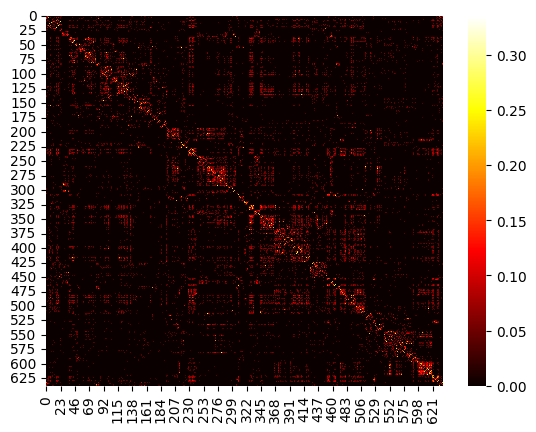

In [8]:
# Generar el mapa de calor de cada matriz de conectividad, MAPA DE CALOR DE LA MATRIZ DE COACTIVACIÓN
sns.heatmap(comat,annot=False, cmap='hot', fmt='2.f')
plt.show()

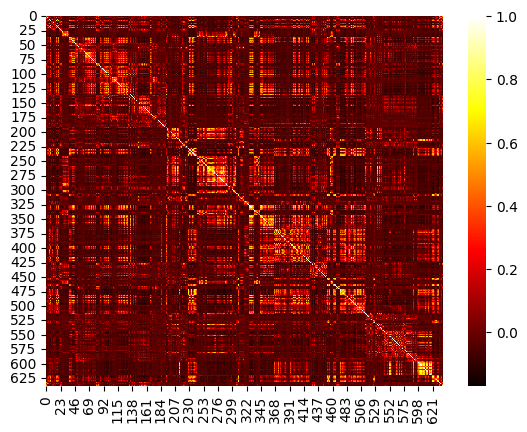

In [201]:
#MAPA DE CALOR DE LA MATRIZ DE CORRELACIÓN A PARTIR DE LA DE COACTIVACIÓN
#(En las instrucciones dice 'de cada matriz de conectividad',y como en el archivo solo hay una matriz,no sabía si se refería a hacer otro tipo de matrices. Igual la hice por si acaso)
sns.heatmap(corr_df,annot=False, cmap='hot', fmt='2.f')
plt.show()

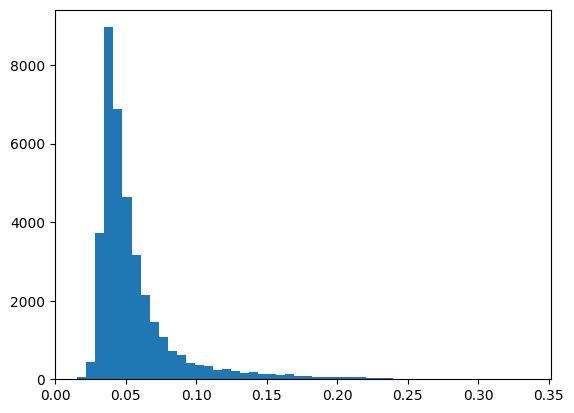

In [243]:
#Generar la distribución de datos de cada matriz de conectividad
plt.hist(comat[comat>0].flatten(),bins=50);

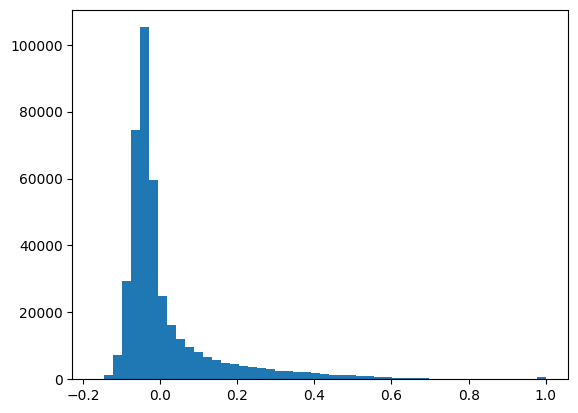

In [244]:
# distribución matriz de correlación
plt.hist(corr_df.to_numpy().flatten(),bins=50);

In [235]:
#¿Qué valor se encuentra en el percentil 0.25, 0.5 y 0.75 de la matriz de conectividad?
per5=np.percentile(comat[comat>0] ,50)
per5

np.float64(0.046052631578947366)

In [168]:
per25=np.percentile(comat[comat>0] ,25)
per25

np.float64(0.03832752613240418)

In [169]:
per75=np.percentile(comat[comat>0] ,75)
per75

np.float64(0.06053268765133172)

In [216]:
# Cree los 3 grafos 2D filtrando la matriz de conectividad con los valores dados por los percentiles del ejercicio anterior

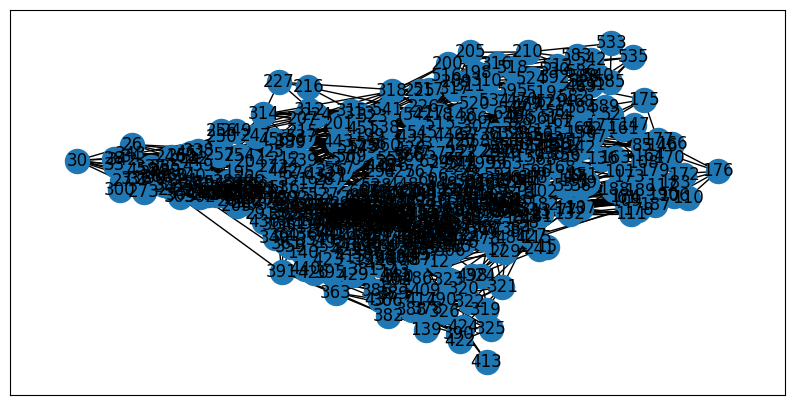

In [309]:
comat_df=pd.DataFrame(comat)
filtro5=comat_df>per5
matriz_filtrada=np.where(filtro5, comat,0)
G1=nx.from_numpy_array(matriz_filtrada)
plt.figure(figsize=(10, 5))
nx.draw_networkx(G1)

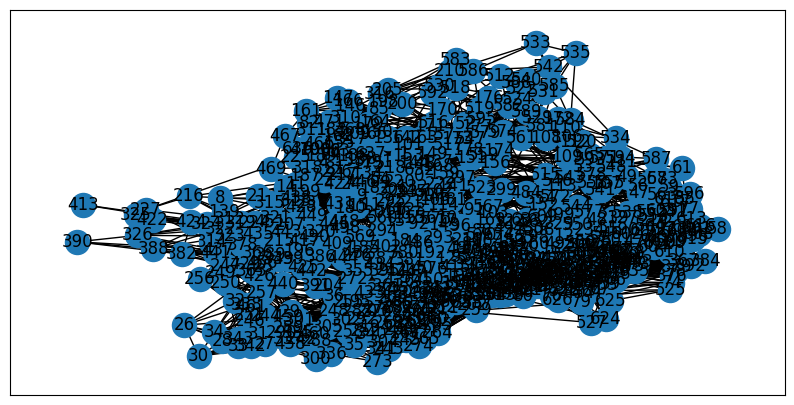

In [299]:
filtro25=comat>per25
matriz_filtrada=np.where(filtro25, comat,0)
G2=nx.from_numpy_array(matriz_filtrada)
plt.figure(figsize=(10, 5))
nx.draw_networkx(G1)

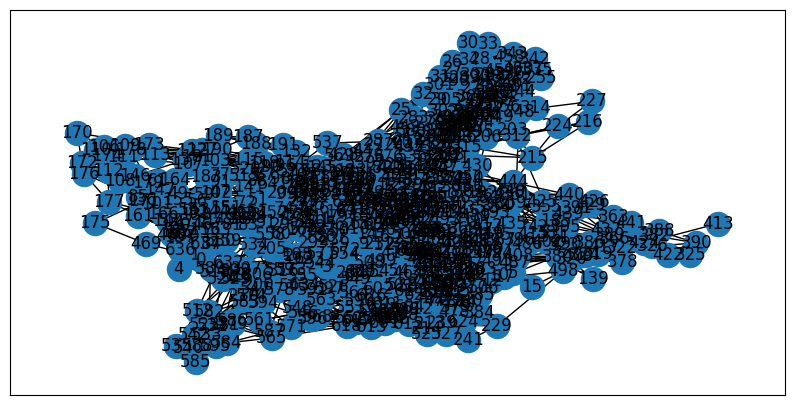

In [300]:
filt75=comat>per75
matriz_filtrada = np.where(filt75, comat,0)
G3=nx.from_numpy_array(matriz_filtrada)
plt.figure(figsize=(10, 5))
nx.draw_networkx(G3)

# 3

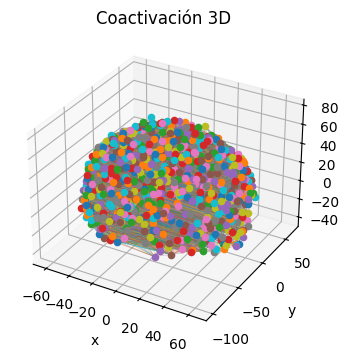

In [181]:
#Graficar grafo 3D
comat_df=pd.DataFrame(comat)
coord_df=pd.DataFrame(coord, columns=['x', 'y', 'z'])

pos3D={i:(coord_df.loc[i,'x'],
             coord_df.loc[i,'y'],
             coord_df.loc[i,'z']) for i in coord_df.index}
GG = nx.from_pandas_adjacency(comat_df, create_using=nx.Graph());

fig= plt.figure(figsize=(4,4))
ax= fig.add_subplot(111, projection='3d')

for i, (x,y,z) in pos3D.items():
    ax.scatter(x,y,z)

for i,j, data in GG.edges(data=True):
    x=[pos3D[i][0],pos3D[j][0]]
    y=[pos3D[i][1],pos3D[j][1]]
    z=[pos3D[i][2],pos3D[j][2]]
    ax.plot(x,y,z,linewidth=data['weight']*2)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Coactivación 3D')
plt.show()

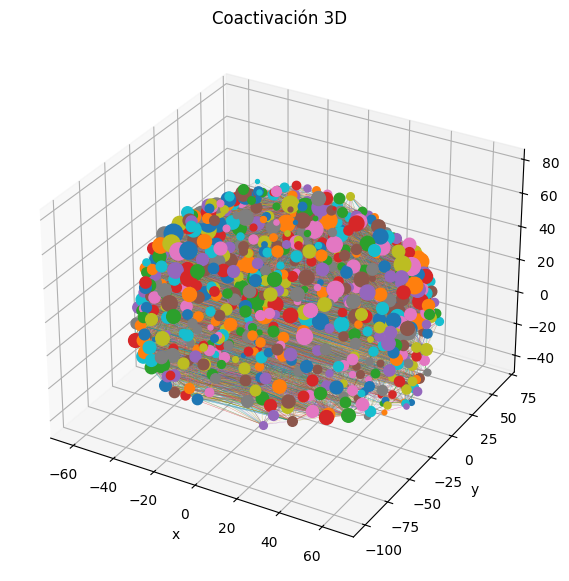

In [182]:
#- Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado

comat_df=pd.DataFrame(comat)
coord_df=pd.DataFrame(coord, columns=['x', 'y', 'z'])

pos3D={i:(coord_df.loc[i,'x'],
             coord_df.loc[i,'y'],
             coord_df.loc[i,'z']) for i in coord_df.index}
GG = nx.from_pandas_adjacency(comat_df, create_using=nx.Graph());

fig= plt.figure(figsize=(7,7))
ax= fig.add_subplot(111, projection='3d')

for i, (x,y,z) in pos3D.items():
    ax.scatter(x,y,z,s=GG.degree[i])

for i,j, data in GG.edges(data=True):
    x=[pos3D[i][0],pos3D[j][0]]
    y=[pos3D[i][1],pos3D[j][1]]
    z=[pos3D[i][2],pos3D[j][2]]
    ax.plot(x,y,z,linewidth=data['weight']*2)



ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Coactivación 3D')
plt.show()

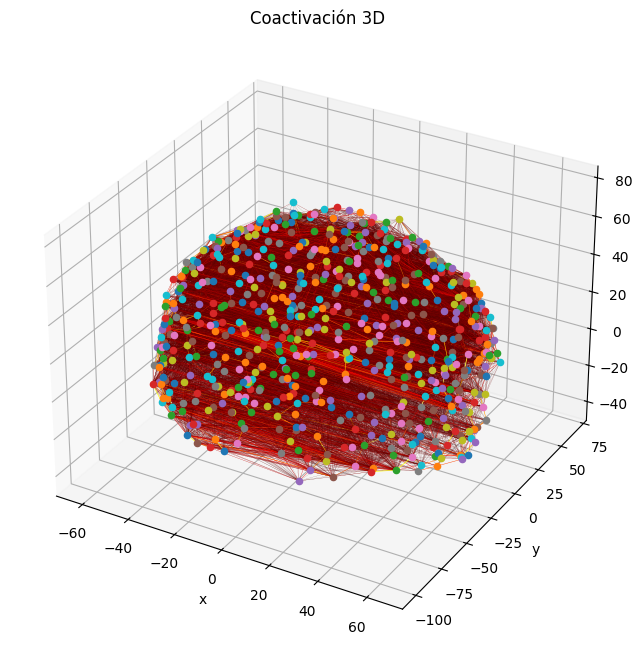

In [288]:
# Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot

comat_df=pd.DataFrame(comat)
coord_df=pd.DataFrame(coord, columns=['x', 'y', 'z'])

pos3D={i:(coord_df.loc[i,'x'],
             coord_df.loc[i,'y'],
             coord_df.loc[i,'z']) for i in coord_df.index}
GG = nx.from_pandas_adjacency(comat_df);

fig= plt.figure(figsize=(8,8))
ax= fig.add_subplot(111, projection='3d')
cmap = plt.get_cmap('hot')
norm = plt.Normalize(comat.min(), comat.max())

for i, (x,y,z) in pos3D.items():
    ax.scatter(x,y,z)

for i,j, data in GG.edges(data=True):
    x=[pos3D[i][0],pos3D[j][0]]
    y=[pos3D[i][1],pos3D[j][1]]
    z=[pos3D[i][2],pos3D[j][2]]
    ax.plot(x,y,z,linewidth=data['weight']*2,color=cmap(norm(data['weight'])))


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Coactivación 3D')
plt.show()

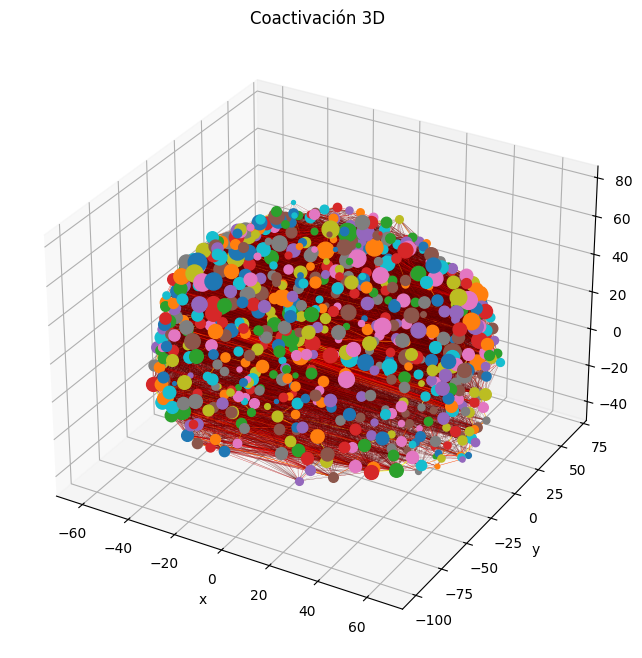

In [287]:
# Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot

comat_df=pd.DataFrame(comat)
coord_df=pd.DataFrame(coord, columns=['x', 'y', 'z'])

pos3D={i:(coord_df.loc[i,'x'],
             coord_df.loc[i,'y'],
             coord_df.loc[i,'z']) for i in coord_df.index}
GG = nx.from_pandas_adjacency(comat_df);

fig= plt.figure(figsize=(8,8))
ax= fig.add_subplot(111, projection='3d')
cmap = plt.get_cmap('hot')
norm = plt.Normalize(comat.min(), comat.max())

for i, (x,y,z) in pos3D.items():
    ax.scatter(x,y,z,s=GG.degree[i])

for i,j, data in GG.edges(data=True):
    x=[pos3D[i][0],pos3D[j][0]]
    y=[pos3D[i][1],pos3D[j][1]]
    z=[pos3D[i][2],pos3D[j][2]]
    ax.plot(x,y,z,linewidth=data['weight']*2,color=cmap(norm(data['weight'])))



ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Coactivación 3D')
plt.show()

In [17]:
cmap = plt.get_cmap('hot')

# 4

In [257]:
edf_path=r"C:\Users\mafig\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\EEG_practica\chb01_01.edf"
sfreq_target=256 #frecuencias demuestreo a la que estamos normalizando
fmin,fmax=8,13 #banda alfa para la coherencia
raw= mne.io.read_raw_edf(edf_path, preload=True)
raw.resample(sfreq_target)
raw.filter(1.,45.,fir_design='firwin')
data= raw.get_data()
ch_names = raw.info['ch_names']
n_channels = len(ch_names)

Extracting EDF parameters from C:\Users\mafig\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\EEG_practica\chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\mafig\AppData\Local\Temp\ipykernel_33856\4287922657.py:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw= mne.io.read_raw_edf(edf_path, preload=True)


Reading 0 ... 921599  =      0.000 ...  3599.996 secs...
Sampling frequency of the instance is already 256.0, returning unmodified.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 845 samples (3.301 s)



In [261]:
# ====== 2. MATRIZ DE COHERENCIA ESPECTRAL ======use esta matriz porque según lo que investigué es la mas adecuada para analizar datos de EEG
coh_matrix = np.zeros((n_channels, n_channels))
for i in range(n_channels):
    for j in range(n_channels):
        f, Cxy = coherence(data[i], data[j], fs=sfreq_target, nperseg=sfreq_target*2)
        mask = (f >= fmin) & (f <= fmax)
        coh_matrix[i, j] = np.mean(Cxy[mask])

coh_df = pd.DataFrame(coh_matrix, index=ch_names, columns=ch_names)
np.fill_diagonal(coh_df.values, 0)#quitar autoconexiones

In [292]:
#Como el valor de coeficiente de mundo pequeño era=1.00, se aplico un umbral para tener un valor más cercano a como son las redes biológicas reales
threshold = np.percentile(coh_df.values, 75)
coh_thr = coh_df.where(coh_df >= threshold, 0)
G = nx.from_pandas_adjacency(coh_thr, create_using=nx.Graph())

C = nx.average_clustering(G)
L = nx.average_shortest_path_length(G.subgraph(max(nx.connected_components(G), key=len)))
G_r = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges())
Cr = nx.average_clustering(G_r)
Lr = nx.average_shortest_path_length(G_r)
sigma = (C / Cr) / (L / Lr)

print(f"Coeficiente de mundo pequeño (σ): {sigma:.3f}")

Coeficiente de mundo pequeño (σ): 1.498


In [293]:
#Como los valores de la eficiencia, eran=1.00, se aplico un umbral para tener un valor más cercano a como son las redes biológicas reales
efg=nx.global_efficiency(G)
print(f"Eficiencia global: {efg:.3f}")

Eficiencia global: 0.570


In [294]:
efl=nx.local_efficiency(G)
print(f"Eficiencia local: {efl:.3f}")

Eficiencia local: 0.721


In [295]:
#- Calcule las comunidades del grafo
G=nx.from_pandas_adjacency(coh_df)
communidades=nx_comm.louvain_communities(G, weight='weight')
print(f'Numero de comunidades:{len(communidades)},Tamaño de cada comunidad:{[len(i) for i in communidades]}')

Numero de comunidades:5,Tamaño de cada comunidad:[7, 7, 2, 5, 2]


In [278]:
#Calcular hubs
sorted(G.degree(weight='weight'),key=lambda x: x[1],reverse=True)[0:5]

[('C3-P3', 2.0474544055394253),
 ('CZ-PZ', 2.019794731769319),
 ('C4-P4', 1.9161394110358936),
 ('T8-P8-0', 1.911428676568295),
 ('T8-P8-1', 1.9114286765682948)]

In [271]:
#- Determine el grado de cada nodo(grado total)
degree = dict(G.degree(weight='weight'))
degree

{'FP1-F7': 1.5122890242542864,
 'F7-T7': 1.1768181602982768,
 'T7-P7': 1.8807158274988045,
 'P7-O1': 1.512205306784289,
 'FP1-F3': 1.5361078293375,
 'F3-C3': 1.4639315521931153,
 'C3-P3': 2.0474544055394253,
 'P3-O1': 1.277560315258838,
 'FP2-F4': 1.5282478510094395,
 'F4-C4': 1.3354585716149316,
 'C4-P4': 1.9161394110358936,
 'P4-O2': 1.7587586262075319,
 'FP2-F8': 1.419768513394453,
 'F8-T8': 1.1303276910090025,
 'T8-P8-0': 1.911428676568295,
 'P8-O2': 1.59784356425029,
 'FZ-CZ': 1.3241141316188643,
 'CZ-PZ': 2.019794731769319,
 'P7-T7': 1.880715827498805,
 'T7-FT9': 1.0974532833312485,
 'FT9-FT10': 0.596947969902062,
 'FT10-T8': 0.7656245710804195,
 'T8-P8-1': 1.9114286765682948}

# 5

In [272]:
coord3d=r"C:\Users\mafig\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\EEG_practica\coordenadas_bipolares_eeg.csv"
coord=pd.read_csv(coord3d)
coord.set_index('canal', inplace=True, drop=True)
coh_df.columns = [columna.split(sep = ' ')[0] for columna in coh_df.columns]
coh_df.index = coh_df.columns

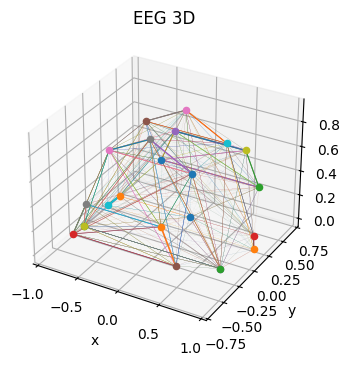

In [273]:
#- Genere el grafo 3D
#- Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
#- Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot

coord_df=pd.DataFrame(coord, columns=['x', 'y', 'z'])

pos3D={canal:(coord_df.loc[canal,'x'],
             coord_df.loc[canal,'y'],
             coord_df.loc[canal,'z']) for canal in coord_df.index}
GG = nx.from_pandas_adjacency(coh_df, create_using=nx.DiGraph());

fig= plt.figure(figsize=(4,4))
ax= fig.add_subplot(111, projection='3d')

for i, (x,y,z) in pos3D.items():
    ax.scatter(x,y,z)

for i,j, data in GG.edges(data=True):
    x=[pos3D[i][0],pos3D[j][0]]
    y=[pos3D[i][1],pos3D[j][1]]
    z=[pos3D[i][2],pos3D[j][2]]
    ax.plot(x,y,z,linewidth=data['weight']*2)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('EEG 3D')
plt.show()

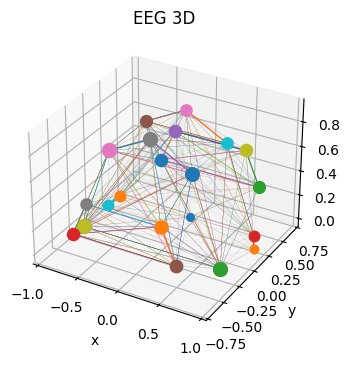

In [274]:

pos3D={canal:(coord_df.loc[canal,'x'],
             coord_df.loc[canal,'y'],
             coord_df.loc[canal,'z']) for canal in coord_df.index}
GG = nx.from_pandas_adjacency(coh_df, create_using=nx.DiGraph());

fig= plt.figure(figsize=(4,4))
ax= fig.add_subplot(111, projection='3d')

for i, (x,y,z) in pos3D.items():
    ax.scatter(x,y,z,s=degree[i]*50)

for i,j, data in GG.edges(data=True):
    x=[pos3D[i][0],pos3D[j][0]]
    y=[pos3D[i][1],pos3D[j][1]]
    z=[pos3D[i][2],pos3D[j][2]]
    ax.plot(x,y,z,linewidth=data['weight']*2)



ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('EEG 3D')
plt.show()

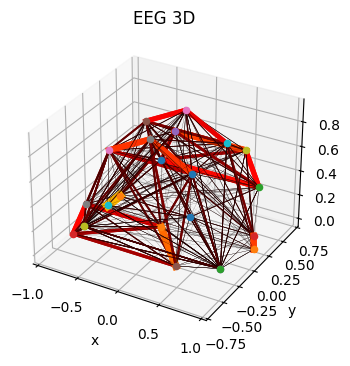

In [275]:
fig= plt.figure(figsize=(4,4))
ax= fig.add_subplot(111, projection='3d')
cmap = plt.get_cmap('hot')
norm = plt.Normalize(coh_df.min().min(), coh_df.max().max())

for i, (x,y,z) in pos3D.items():
    ax.scatter(x,y,z)

for i,j, data in GG.edges(data=True):
    x=[pos3D[i][0],pos3D[j][0]]
    y=[pos3D[i][1],pos3D[j][1]]
    z=[pos3D[i][2],pos3D[j][2]]
    ax.plot(x,y,z,linewidth=data['weight']*10,color=cmap(norm(data['weight'])))


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('EEG 3D')
plt.show()

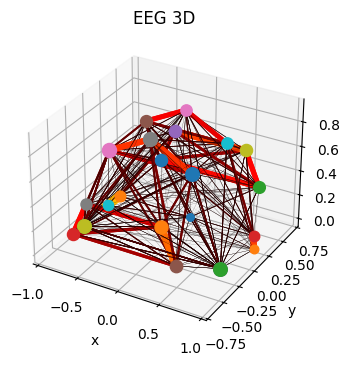

In [276]:
fig= plt.figure(figsize=(4,4))
ax= fig.add_subplot(111, projection='3d')
cmap = plt.get_cmap('hot')
norm = plt.Normalize(coh_df.min().min(), coh_df.max().max())

for i, (x,y,z) in pos3D.items():
    ax.scatter(x,y,z,s=degree[i]*50)

for i,j, data in GG.edges(data=True):
    x=[pos3D[i][0],pos3D[j][0]]
    y=[pos3D[i][1],pos3D[j][1]]
    z=[pos3D[i][2],pos3D[j][2]]
    ax.plot(x,y,z,linewidth=data['weight']*10,color=cmap(norm(data['weight'])))


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('EEG 3D')
plt.show()